In [33]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

database = pd.read_csv('Twitter_May_Nov_5000.csv')

[nltk_data] Downloading package stopwords to C:\Users\Chung
[nltk_data]     KY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
database

,Datetime,Tweet Id,Text,Username,Coordinates,Place
0,2020-11-29 23:59:40+00:00,1333198979224399873,@nspector4 @keithbaldrey France initiated dras...,Teelin,NaN,NaN
1,2020-11-29 23:58:54+00:00,1333198786475286528,@ClareCraigPath Drosten paper @WHO relied on t...,mdfdvntrs,NaN,NaN
2,2020-11-29 23:57:50+00:00,1333198514453671937,@Amelia28938902 Drosten paper @WHO relied on t...,mdfdvntrs,NaN,NaN
3,2020-11-29 23:57:28+00:00,1333198421692395521,@SJL99 @BorisJohnson @MattHancock Drosten pape...,mdfdvntrs,NaN,NaN
4,2020-11-29 23:56:54+00:00,1333198282592546818,@VeganaHedgehog @TheSun @Telegraph @DailyMailU...,mdfdvntrs,NaN,NaN
...,...,...,...,...,...,...
4996,2020-11-24 22:02:18+00:00,1331357500537405441,#pinup #pinupstyle #pinupfashion #mermaiddress...,MissVintageVan,NaN,NaN
4997,2020-11-24 22:01:41+00:00,1331357345637572609,#pinup #pinupstyle #pinupfashion #mermaiddress...,MissVintageVan,NaN,NaN
4998,2020-11-24 22:00:59+00:00,1331357169573302274,@agalbraith I think allowing “ sale of non-ess...,kouk_nadene,NaN,NaN
4999,2020-11-24 22:00:18+00:00,1331356996717539332,@GlobalCalgary Str8 up clowning 🤡 and after lo...,CheddarCollecta,NaN,NaN


In [40]:
print(database['original_text'].isna().sum())

0


In [4]:
df2 = database['original_text'].fillna('')
database['original_text'] = df2

KeyError: 'original_text'

In [5]:
print(database['original_text'].isna().sum())

KeyError: 'original_text'

In [57]:
#Identify Language

In [9]:
!pip install spacy


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 15.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!pip install spacy_fastlang


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import spacy
import spacy_fastlang

import itertools

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("language_detector")

language = []

for i in zip(database['original_text']):
        language.append(nlp(str(i))._.language)
        
database['language'] = language

In [43]:
database

,author_id,conversation_id,id,edit_history_tweet_ids,text,created_at,withheld.copyright,withheld.country_codes,author_name,orginal_text,original_text
0,495071269,1640204550631043072,1640204550631043072,['1640204550631043072'],RT @Chris_EvansMP: Today marks three years sin...,2023-03-27T04:10:13.000Z,NaN,NaN,BarnettElaine,Today marks three years since the UK went int...,Today marks three years since the UK went int...
1,1564131612505149440,1639919857012469760,1640204157683417089,['1640204157683417089'],@RoastSmith_ I used play Fortnite a lot on my ...,2023-03-27T04:08:39.000Z,NaN,NaN,tanseus1,@RoastSmith_ I used play Fortnite a lot on my ...,@RoastSmith_ I used play Fortnite a lot on my ...
2,1548020151814987779,1640202097772601345,1640202097772601345,['1640202097772601345'],RT @Somali_ICS: If it wasn't for #Tiktok there...,2023-03-27T04:00:28.000Z,NaN,NaN,Somali_ICS,If it wasn't for #Tiktok there would've been ...,If it wasn't for #Tiktok there would've been ...
3,27968588,1640194922799144961,1640194922799144961,['1640194922799144961'],@NYCMayor @ericadamsfornyc time to change cour...,2023-03-27T03:31:57.000Z,NaN,NaN,vliscony,@NYCMayor @ericadamsfornyc time to change cour...,@NYCMayor @ericadamsfornyc time to change cour...
4,1428236322838220802,1640190517093990400,1640190517093990400,['1640190517093990400'],Feeling in the dumps because of lockdown? \r\n...,2023-03-27T03:14:27.000Z,NaN,NaN,CovidHelpBot,Feeling in the dumps because of lockdown? \r\n...,Feeling in the dumps because of lockdown? \r\n...
...,...,...,...,...,...,...,...,...,...,...,...
3745,1428236322838220802,1637683999882760192,1637683999882760192,['1637683999882760192'],Feeling unhappy because of lockdown? \r\nHere ...,2023-03-20T05:14:26.000Z,NaN,NaN,CovidHelpBot,Feeling unhappy because of lockdown? \r\nHere ...,Feeling unhappy because of lockdown? \r\nHere ...
3746,1590162549525422080,1637617552351215616,1637683256580616192,['1637683256580616192'],@TRyanGregory Lockdowns make billionaires more...,2023-03-20T05:11:29.000Z,NaN,NaN,InfiniteKB_Com,@TRyanGregory Lockdowns make billionaires more...,@TRyanGregory Lockdowns make billionaires more...
3747,85601740,1637680366268841984,1637680366268841984,['1637680366268841984'],"Of not passing: homelessness, addiction, menta...",2023-03-20T05:00:00.000Z,NaN,NaN,Prison_Health,"Of not passing: homelessness, addiction, menta...","Of not passing: homelessness, addiction, menta..."
3748,1557364662546714626,1637561236274528257,1637678230713909250,['1637678230713909250'],"@olaadun @Samuelo84500495 @Dawa911 No, they wo...",2023-03-20T04:51:31.000Z,NaN,NaN,ElliotLinksync,"@olaadun @Samuelo84500495 @Dawa911 No, they wo...","@olaadun @Samuelo84500495 @Dawa911 No, they wo..."


In [14]:
df = database[database['language'] == 'en']

In [15]:
df.iloc[0]

author_id                                                         495071269
conversation_id                                         1640204550631043072
id                                                      1640204550631043072
edit_history_tweet_ids                              ['1640204550631043072']
text                      RT @Chris_EvansMP: Today marks three years sin...
created_at                                         2023-03-27T04:10:13.000Z
withheld.copyright                                                      NaN
withheld.country_codes                                                  NaN
author_name                                                   BarnettElaine
orginal_text               Today marks three years since the UK went int...
original_text              Today marks three years since the UK went int...
language                                                                 en
Name: 0, dtype: object

In [35]:
#preprocess

In [36]:
preprocess_review = pd.DataFrame(database['Text'])

In [37]:
preprocess_review

,Text
0,@nspector4 @keithbaldrey France initiated dras...
1,@ClareCraigPath Drosten paper @WHO relied on t...
2,@Amelia28938902 Drosten paper @WHO relied on t...
3,@SJL99 @BorisJohnson @MattHancock Drosten pape...
4,@VeganaHedgehog @TheSun @Telegraph @DailyMailU...
...,...
4996,#pinup #pinupstyle #pinupfashion #mermaiddress...
4997,#pinup #pinupstyle #pinupfashion #mermaiddress...
4998,@agalbraith I think allowing “ sale of non-ess...
4999,@GlobalCalgary Str8 up clowning 🤡 and after lo...


In [38]:
# lower
overall_reviews_lower = []

for i in preprocess_review['Text']:
    overall_reviews_lower.append(i.lower())

preprocess_review['Text_lower'] = overall_reviews_lower

In [39]:
preprocess_review

,Text,Text_lower
0,@nspector4 @keithbaldrey France initiated dras...,@nspector4 @keithbaldrey france initiated dras...
1,@ClareCraigPath Drosten paper @WHO relied on t...,@clarecraigpath drosten paper @who relied on t...
2,@Amelia28938902 Drosten paper @WHO relied on t...,@amelia28938902 drosten paper @who relied on t...
3,@SJL99 @BorisJohnson @MattHancock Drosten pape...,@sjl99 @borisjohnson @matthancock drosten pape...
4,@VeganaHedgehog @TheSun @Telegraph @DailyMailU...,@veganahedgehog @thesun @telegraph @dailymailu...
...,...,...
4996,#pinup #pinupstyle #pinupfashion #mermaiddress...,#pinup #pinupstyle #pinupfashion #mermaiddress...
4997,#pinup #pinupstyle #pinupfashion #mermaiddress...,#pinup #pinupstyle #pinupfashion #mermaiddress...
4998,@agalbraith I think allowing “ sale of non-ess...,@agalbraith i think allowing “ sale of non-ess...
4999,@GlobalCalgary Str8 up clowning 🤡 and after lo...,@globalcalgary str8 up clowning 🤡 and after lo...


In [40]:
# remove punctuations

punctuations = '''()[]{};:'"\,<>./?@#$%^&*_~-'''

def remove_punct(text):
    no_punct = ""
    for char in text:
        if char not in punctuations:
            no_punct += char
        else:
            no_punct += " "
    
    return re.sub(' +', ' ',no_punct)

overall_reviews_remove_punct = []


for i in overall_reviews_lower:
    overall_reviews_remove_punct.append(remove_punct(i))
    
preprocess_review['Textt_remove_punct'] = overall_reviews_remove_punct

In [41]:
preprocess_review

,Text,Text_lower,Textt_remove_punct
0,@nspector4 @keithbaldrey France initiated dras...,@nspector4 @keithbaldrey france initiated dras...,nspector4 keithbaldrey france initiated drast...
1,@ClareCraigPath Drosten paper @WHO relied on t...,@clarecraigpath drosten paper @who relied on t...,clarecraigpath drosten paper who relied on to...
2,@Amelia28938902 Drosten paper @WHO relied on t...,@amelia28938902 drosten paper @who relied on t...,amelia28938902 drosten paper who relied on to...
3,@SJL99 @BorisJohnson @MattHancock Drosten pape...,@sjl99 @borisjohnson @matthancock drosten pape...,sjl99 borisjohnson matthancock drosten paper ...
4,@VeganaHedgehog @TheSun @Telegraph @DailyMailU...,@veganahedgehog @thesun @telegraph @dailymailu...,veganahedgehog thesun telegraph dailymailuk t...
...,...,...,...
4996,#pinup #pinupstyle #pinupfashion #mermaiddress...,#pinup #pinupstyle #pinupfashion #mermaiddress...,pinup pinupstyle pinupfashion mermaiddress st...
4997,#pinup #pinupstyle #pinupfashion #mermaiddress...,#pinup #pinupstyle #pinupfashion #mermaiddress...,pinup pinupstyle pinupfashion mermaiddress st...
4998,@agalbraith I think allowing “ sale of non-ess...,@agalbraith i think allowing “ sale of non-ess...,agalbraith i think allowing “ sale of non ess...
4999,@GlobalCalgary Str8 up clowning 🤡 and after lo...,@globalcalgary str8 up clowning 🤡 and after lo...,globalcalgary str8 up clowning 🤡 and after lo...


In [42]:
# remove stopwords
import gensim

all_stopwords = gensim.parsing.preprocessing.STOPWORDS

additional_stop_words = ['']

all_stopwords = all_stopwords.union(set(additional_stop_words))

def remove_mystopwords(sentence):
    tokens = sentence.split(" ")
    tokens_filtered= [word for word in tokens if not word in all_stopwords]
    clean = (" ").join(tokens_filtered)
    return clean

overall_reviews_clean = []

for i in overall_reviews_remove_punct:
    overall_reviews_clean.append(remove_mystopwords(i))

preprocess_review['Text_clean'] = overall_reviews_clean

In [43]:
preprocess_review

,Text,Text_lower,Textt_remove_punct,Text_clean
0,@nspector4 @keithbaldrey France initiated dras...,@nspector4 @keithbaldrey france initiated dras...,nspector4 keithbaldrey france initiated drast...,nspector4 keithbaldrey france initiated drasti...
1,@ClareCraigPath Drosten paper @WHO relied on t...,@clarecraigpath drosten paper @who relied on t...,clarecraigpath drosten paper who relied on to...,clarecraigpath drosten paper relied justify us...
2,@Amelia28938902 Drosten paper @WHO relied on t...,@amelia28938902 drosten paper @who relied on t...,amelia28938902 drosten paper who relied on to...,amelia28938902 drosten paper relied justify us...
3,@SJL99 @BorisJohnson @MattHancock Drosten pape...,@sjl99 @borisjohnson @matthancock drosten pape...,sjl99 borisjohnson matthancock drosten paper ...,sjl99 borisjohnson matthancock drosten paper r...
4,@VeganaHedgehog @TheSun @Telegraph @DailyMailU...,@veganahedgehog @thesun @telegraph @dailymailu...,veganahedgehog thesun telegraph dailymailuk t...,veganahedgehog thesun telegraph dailymailuk th...
...,...,...,...,...
4996,#pinup #pinupstyle #pinupfashion #mermaiddress...,#pinup #pinupstyle #pinupfashion #mermaiddress...,pinup pinupstyle pinupfashion mermaiddress st...,pinup pinupstyle pinupfashion mermaiddress sto...
4997,#pinup #pinupstyle #pinupfashion #mermaiddress...,#pinup #pinupstyle #pinupfashion #mermaiddress...,pinup pinupstyle pinupfashion mermaiddress st...,pinup pinupstyle pinupfashion mermaiddress sto...
4998,@agalbraith I think allowing “ sale of non-ess...,@agalbraith i think allowing “ sale of non-ess...,agalbraith i think allowing “ sale of non ess...,agalbraith think allowing “ sale non essential...
4999,@GlobalCalgary Str8 up clowning 🤡 and after lo...,@globalcalgary str8 up clowning 🤡 and after lo...,globalcalgary str8 up clowning 🤡 and after lo...,globalcalgary str8 clowning 🤡 lockdown it’ll d...


In [44]:
#lemmatize 

def lemmatizing(string):
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(string)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

overall_reviews_lemme = []

for i in overall_reviews_clean:
    overall_reviews_lemme.append(lemmatizing(i))

preprocess_review['Text_lemme'] = overall_reviews_lemme

In [45]:
preprocess_review

,Text,Text_lower,Textt_remove_punct,Text_clean,Text_lemme
0,@nspector4 @keithbaldrey France initiated dras...,@nspector4 @keithbaldrey france initiated dras...,nspector4 keithbaldrey france initiated drast...,nspector4 keithbaldrey france initiated drasti...,nspector4 keithbaldrey france initiated drasti...
1,@ClareCraigPath Drosten paper @WHO relied on t...,@clarecraigpath drosten paper @who relied on t...,clarecraigpath drosten paper who relied on to...,clarecraigpath drosten paper relied justify us...,clarecraigpath drosten paper relied justify us...
2,@Amelia28938902 Drosten paper @WHO relied on t...,@amelia28938902 drosten paper @who relied on t...,amelia28938902 drosten paper who relied on to...,amelia28938902 drosten paper relied justify us...,amelia28938902 drosten paper relied justify us...
3,@SJL99 @BorisJohnson @MattHancock Drosten pape...,@sjl99 @borisjohnson @matthancock drosten pape...,sjl99 borisjohnson matthancock drosten paper ...,sjl99 borisjohnson matthancock drosten paper r...,sjl99 borisjohnson matthancock drosten paper r...
4,@VeganaHedgehog @TheSun @Telegraph @DailyMailU...,@veganahedgehog @thesun @telegraph @dailymailu...,veganahedgehog thesun telegraph dailymailuk t...,veganahedgehog thesun telegraph dailymailuk th...,veganahedgehog thesun telegraph dailymailuk th...
...,...,...,...,...,...
4996,#pinup #pinupstyle #pinupfashion #mermaiddress...,#pinup #pinupstyle #pinupfashion #mermaiddress...,pinup pinupstyle pinupfashion mermaiddress st...,pinup pinupstyle pinupfashion mermaiddress sto...,pinup pinupstyle pinupfashion mermaiddress sto...
4997,#pinup #pinupstyle #pinupfashion #mermaiddress...,#pinup #pinupstyle #pinupfashion #mermaiddress...,pinup pinupstyle pinupfashion mermaiddress st...,pinup pinupstyle pinupfashion mermaiddress sto...,pinup pinupstyle pinupfashion mermaiddress sto...
4998,@agalbraith I think allowing “ sale of non-ess...,@agalbraith i think allowing “ sale of non-ess...,agalbraith i think allowing “ sale of non ess...,agalbraith think allowing “ sale non essential...,agalbraith think allowing “ sale non essential...
4999,@GlobalCalgary Str8 up clowning 🤡 and after lo...,@globalcalgary str8 up clowning 🤡 and after lo...,globalcalgary str8 up clowning 🤡 and after lo...,globalcalgary str8 clowning 🤡 lockdown it’ll d...,globalcalgary str8 clowning 🤡 lockdown it ’ ll...


In [46]:
preprocess_review.to_csv('new_Cleaned_preprocessing_Twitter_May_Nov.csv', index=False)

In [1]:
#Sentiment Analysis
# References: 1)https://www.youtube.com/watch?v=b9-0GpCqAQw&t=5s 2)https://huggingface.co/arpanghoshal/EmoRoBERTa

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

database1 = pd.read_csv('Twitter_Jan_Mar_5000.csv')

In [137]:
database2 = database1
database2 = database2.applymap(str)

In [138]:
#Size of dataset
database2.shape

(1335, 7)

In [139]:
# New sentiment (Emoroberta - dataset labelled 58000 reddit comments with 28 emotions)
# Reference - https://github.com/amrrs/emotion-detection-from-text-python/blob/main/Text_Emotion_Detection_in_Python.ipynb

In [140]:
#Install pytorch
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [141]:
!pip install transformers -q


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [142]:
!pip install tensorflow


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [143]:
#from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline
from transformers import pipeline

In [144]:
#pipeline route (speed)
#emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa' , return_all_scores= True)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
C:\Users\Chung KY\anaconda3\lib\site-packages\transformers\pipelines\text_classification.py:89: UserWarning: `return_all_scores` is now deprecated, use `top_k=1` if you want similar functionnality
  warnings.warn(


In [145]:
#Append top 3 emotions into dataframe
database2['top_emotion'] = database2['Text_lemme'][0:].apply(emotion,top_k=3)
database2

,Datetime,Tweet Id,Text,Username,Coordinates,Place,Text_lemme,top_emotion
0,2020-03-01 23:54:33+00:00,1.23427e+18,Coronavirus: Washington state nursing home pla...,Asitseemstome,nan,nan,coronavirus washington state nursing home plac...,"[{'label': 'neutral', 'score': 0.9971657395362..."
1,2020-03-01 23:16:50+00:00,1.23426e+18,@amybruni @JohnDePetroshow @NewportBuzz Someon...,LaGringaLoca666,nan,nan,amybruni johndepetroshow newportbuzz know rush...,"[{'label': 'neutral', 'score': 0.9966366291046..."
2,2020-03-01 23:16:01+00:00,1.23426e+18,@luispedrocoelho Here's how the #coronavirus s...,NccAcc,nan,nan,luispedrocoelho s coronavirus situation look l...,"[{'label': 'admiration', 'score': 0.7438641190..."
3,2020-03-01 22:46:54+00:00,1.23425e+18,Tourists staying at a Tenerife hotel that has ...,Apex_WW,nan,nan,tourist staying tenerife hotel lockdown case c...,"[{'label': 'neutral', 'score': 0.9951552152633..."
4,2020-03-01 22:45:18+00:00,1.23425e+18,We don't have a clue.\r\nOnly thing we saw is ...,AnjaLenaerts,nan,nan,t clue only thing saw china taking draconic me...,"[{'label': 'fear', 'score': 0.3849634230136871..."
...,...,...,...,...,...,...,...,...
1330,2020-02-11 22:23:18+00:00,1.22736e+18,I feel for the people on lockdown from the cor...,itsSamEm,nan,nan,feel people lockdown coronavirus world war z v...,"[{'label': 'neutral', 'score': 0.9934558272361..."
1331,2020-02-11 22:19:29+00:00,1.22736e+18,#CZ311 #China Southern #Airlines #Guangzhou\r\...,K_B79,nan,nan,cz311 china southern airline guangzhou toronto...,"[{'label': 'neutral', 'score': 0.9900867342948..."
1332,2020-02-11 22:18:28+00:00,1.22736e+18,"Where did those 60,000 people in Wuhan go befo...",paiement_steve,nan,nan,60 000 people wuhan lockdown answer coronaviru...,"[{'label': 'neutral', 'score': 0.9961665272712..."
1333,2020-02-11 19:22:52+00:00,1.22731e+18,‘Should We Leave?’ Life in China Under Coronav...,iChinadian,nan,nan,‘ should leave ’ life china coronavirus lockdo...,"[{'label': 'neutral', 'score': 0.9929574728012..."


In [146]:
#Extracting data frame into csv for data visualization
database2.to_csv('top3_emotions_twitter_Jan_Mar_1.csv', index=False)

In [90]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

database = pd.read_csv('Twitter_Covid-19_Lockdown_5000.csv')

[nltk_data] Downloading package stopwords to C:\Users\Chung
[nltk_data]     KY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
import seaborn as sns

Text(0.5, 1.0, 'Emotion Distribution')

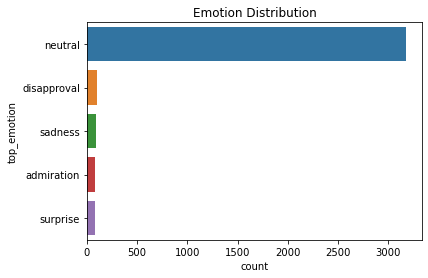

In [92]:
#Display bar chart
sns.countplot(data = database, y = 'top_emotion', order=database['top_emotion'].value_counts().iloc[:5].index).set_title("Emotion Distribution")

In [4]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

database = pd.read_csv('corona_lockdown_comments.csv')

[nltk_data] Downloading package stopwords to C:\Users\Chung
[nltk_data]     KY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import seaborn as sns

Text(0.5, 1.0, 'Emotion Distribution')

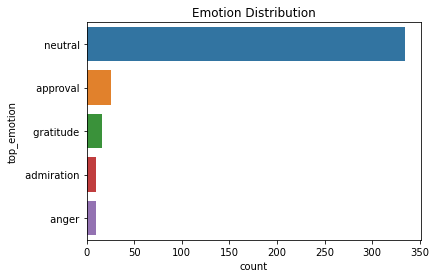

In [6]:
#Display bar chart
sns.countplot(data = database, y = 'top_emotion', order=database['top_emotion'].value_counts().iloc[:5].index).set_title("Emotion Distribution")

In [7]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

database = pd.read_csv('covid19_lockdown_comments.csv')

[nltk_data] Downloading package stopwords to C:\Users\Chung
[nltk_data]     KY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import seaborn as sns

Text(0.5, 1.0, 'Emotion Distribution')

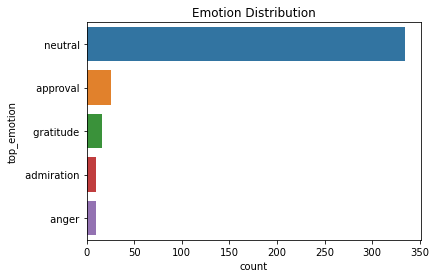

In [9]:
#Display bar chart
sns.countplot(data = database, y = 'top_emotion', order=database['top_emotion'].value_counts().iloc[:5].index).set_title("Emotion Distribution")